<a href="https://colab.research.google.com/github/sonnnaya/MinimumDistanceClassification/blob/master/MinimumDistanceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification by minimum distance
## Introduction
The classification of images implies the process of assigning given images to the corresponding classes according to some general characteristics determined by the conditions of the study.

> Блок с отступами



Images are mathematically described by vectors in n-dimensional space, where each coordinate numerically describes a certain property of this object.

$$
\overline{x}=[x_{1},x_{2},...,x_{n}]^{T}
$$

In turn, the classes $w_{1},w_{2},...,w_{m}$ characterize themselves in a certain standard-image $\overline{z}_{1},\overline{z}_{2},...,\overline{z}_{m}$.

## Minimum distance criterion
Distance functions is the most natural way to estimate the degree of similarity for image vectors.
The Euclidean distance between the certain image-vector $\overline{x}$ and $\overline{z}_{i}$ standard is determined by the following expression:
$$
D_{i}=|\overline{x}-\overline{z}_{i}|=\sqrt{(\overline{x}-\overline{z}_{i})^{T}*(\overline{x}-\overline{z}_{i})}=\sqrt{\sum_{j=1}^{n} (x_{j}-z_{ij})}
$$
Then, the image $\overline{x}$ belongs to the class $w_{i}$, if the condition is satisfied:
$$
D_{i}=min(D_{1},D_{2},...,D_{j}),\ where\ \forall i \neq j \ and \ i,j=\overline{1,M}
$$


In [5]:
from typing import List
import numpy as np


class Cluster:
    def __init__(self, standards: List[list]):
        self.standards: List[np.ndarray] = [np.array(each) for each in standards]
        self.images: List[np.ndarray] = []

    def get_distance(self, image: list):
        to_all_standards = [np.linalg.norm(np.array(image) - each) for each in self.standards]
        return min(to_all_standards)

    def add_image(self, image: list):
        self.images.append(np.array(image))

*If a class is described by a set of standards, then we will look for the minimum value from all of its standards.*

In [6]:
def get_clustered(image_list: List[list], cluster_list: List[Cluster]):
    clustered = cluster_list[:]

    for image in image_list:
        distances = [cluster.get_distance(image) for cluster in cluster_list]
        minimum = min(distances)
        index = distances.index(minimum)
        clustered[index].add_image(image)

    return clustered

# Testing

In [10]:
from google.colab import files 

  
uploaded = files.upload()

Saving data_test.csv to data_test.csv


In [19]:
from numpy import genfromtxt


images  = genfromtxt('data_test.csv', delimiter=',')
clusters = [Cluster([[0.52, 5.7]]), Cluster([[-7.72, 1.06]]),
            Cluster([[5.3, -2.61]]), Cluster([[-1.81, -6.34]])]

classificated = get_clustered(images, clusters)

for i, each in enumerate(classificated):
    print(f"Class {str(i + 1)}:")
    for image in each.images:
        print(list(image), end=', ')
    print()

Class 1:
[0.52, 5.7], [1.68, 5.97], [1.5, 8.2], [-1.19, 7.64], [1.59, 3.7], [-0.58, 4.73], [0.56, 9.33], 
Class 2:
[-7.72, 1.06], [-7.03, 0.36], [-6.69, 2.33], [-8.26, -1.7], [-8.12, -3.31], [-5.79, -2.7], [-4.7, 0.09], 
Class 3:
[5.3, -2.61], [3.71, -2.46], [6.38, 1.0], [3.63, 0.82], [6.44, -2.58], [5.66, 0.73], 
Class 4:
[-1.81, -6.34], [0.72, -7.0], [0.78, -4.55], [-0.83, -4.4], [-0.49, -7.97], [-1.72, -8.46], [-1.45, -3.73], [1.54, -5.91], 


# Visualization of classification results

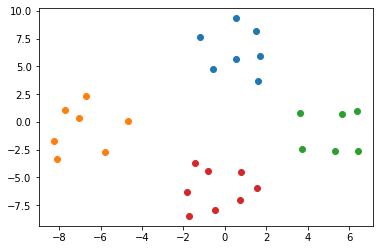

In [18]:
import matplotlib.pyplot as plt


image_clusters = [cluster.images for cluster in classificated]

x_es = [[image[0] for image in images] for images in image_clusters]
y_es = [[image[1] for image in images] for images in image_clusters]

for i in range(len(x_es)):
    plt.scatter(x_es[i], y_es[i])

plt.show()